<a href="https://colab.research.google.com/github/nimanejatifar/DeepLearning1402-03/blob/main/11-Convolutional-Neural-Network-(MNIST_digits_dataset).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout


mnist = tf.keras.datasets.mnist

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [4]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [5]:
y_train.shape

(60000,)

In [6]:
# Preprocess input data for Keras.
# ***** one-hot encoding: We can use SparseCategoricalCrossentropy instead. instead
# y_train = keras.utils.to_categorical(y_train, num_classes=10)
# y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [7]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [8]:
# Reshape to original image shape (n x 784)  ==> (n x 28 x 28 x 1)
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)
# *** -1 refers to 3500 (count of samples) ***

# Preprocess class labels *** One-Hot making ***
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [9]:
# Model architecture
cnn_model = Sequential()
cnn_model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(28, 28, 1)))
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu'))


cnn_model.add(layers.Flatten())
# Fully connected do classification for us
cnn_model.add(layers.Dense(128, activation='relu'))
cnn_model.add(Dropout(0.5))
cnn_model.add(layers.Dense(10, activation='softmax'))

In [10]:
cnn_model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [11]:
CNN = cnn_model.fit(x_train, y_train,
          epochs=30, batch_size=512, validation_split=0.2)

Epoch 1/30
94/94 [==============================] - 7s 19ms/step - loss: 0.7220 - accuracy: 0.7775 - val_loss: 0.1554 - val_accuracy: 0.9522
Epoch 2/30
94/94 [==============================] - 1s 10ms/step - loss: 0.1811 - accuracy: 0.9467 - val_loss: 0.0782 - val_accuracy: 0.9772
Epoch 3/30
94/94 [==============================] - 1s 12ms/step - loss: 0.1151 - accuracy: 0.9656 - val_loss: 0.0581 - val_accuracy: 0.9831
Epoch 4/30
94/94 [==============================] - 1s 13ms/step - loss: 0.0883 - accuracy: 0.9740 - val_loss: 0.0536 - val_accuracy: 0.9846
Epoch 5/30
94/94 [==============================] - 1s 13ms/step - loss: 0.0744 - accuracy: 0.9779 - val_loss: 0.0486 - val_accuracy: 0.9858
Epoch 6/30
94/94 [==============================] - 1s 11ms/step - loss: 0.0625 - accuracy: 0.9816 - val_loss: 0.0410 - val_accuracy: 0.9876
Epoch 7/30
94/94 [==============================] - 1s 11ms/step - loss: 0.0547 - accuracy: 0.9840 - val_loss: 0.0402 - val_accuracy: 0.9882
Epoch 8/30
94

In [12]:
CNN

In [13]:
CNN.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [14]:
print("Test Accuracy:",CNN.history['val_accuracy'][-1],
      "\nMaximum Test Acuracy During Training: ",
      max(CNN.history['val_accuracy']))

Test Accuracy: 0.9911666512489319 
Maximum Test Acuracy During Training:  0.9920833110809326


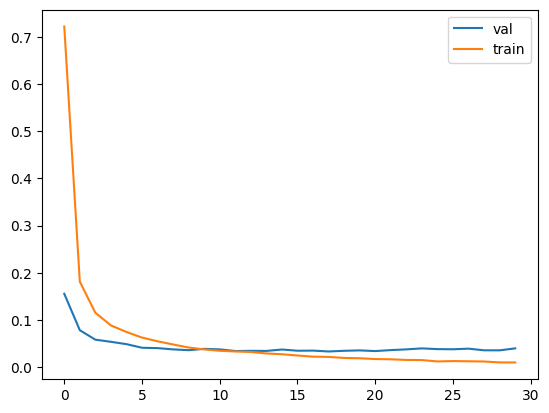

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(CNN.history['val_loss'])
plt.plot(CNN.history['loss'])
plt.legend(['val', 'train'])

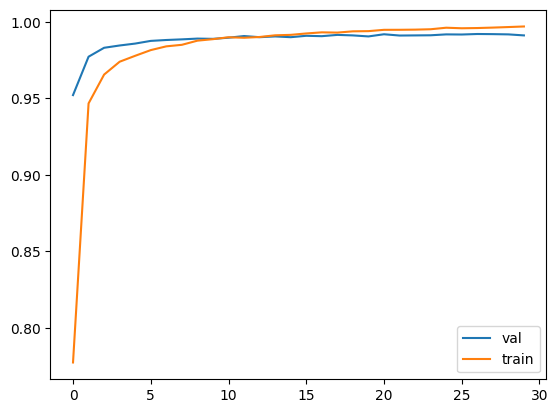

In [16]:
plt.plot(CNN.history['val_accuracy'])
plt.plot(CNN.history['accuracy'])
plt.legend(['val', 'train'])

In [17]:
y_test[10]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [18]:
x_test[10].shape

(28, 28, 1)

In [19]:
test_sample = x_test[10].reshape(1,28,28,1)

In [20]:
t2 = cnn_model.predict(test_sample)
t2

1/1 [==============================] - 0s 256ms/step


array([[1.0000000e+00, 1.7637307e-17, 4.7758726e-13, 3.6827381e-17,
        1.9325495e-15, 5.3135915e-17, 3.4799020e-14, 6.9714380e-16,
        1.3899568e-16, 3.4375287e-11]], dtype=float32)

In [25]:
loss, accuracy = cnn_model.evaluate(x_test, y_test)
print(loss)
print(accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.0233 - accuracy: 0.9939
0.023303396999835968
0.9939000010490417


In [26]:
np.max(t2)

1.0

1/1 [==============================] - 0s 131ms/step
The below image probably shows the number 8


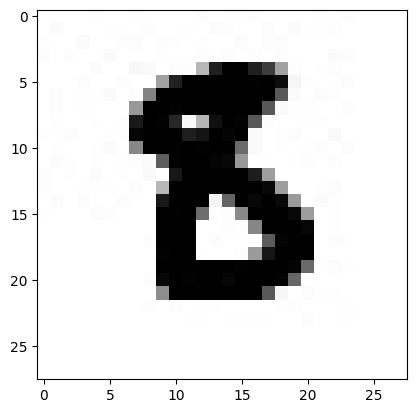

1/1 [==============================] - 0s 29ms/step
The below image probably shows the number 3


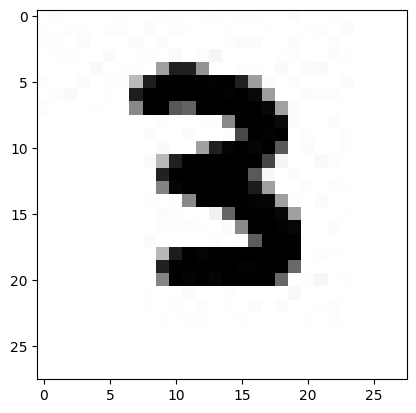

In [27]:
image_number = 1
while os.path.isfile(f"img{image_number}.jpg"):
  try:
    img = cv2.imread(f"img{image_number}.jpg")[:,:,0]
    img = np.invert(np.array([img]))
    prediction = cnn_model.predict(img)
    if np.max(prediction) < 0.9:
        continue

    print(f"The below image probably shows the number {np.argmax(prediction)}")
    plt.imshow(img[0], cmap=plt.cm.binary)
    plt.show()
  except:
    print("Error")
  finally:
    image_number += 1